# Visualizing Data using Matplotlib

### Import Pandas
Akan diimport pandas terlebih dahulu

In [1]:
import pandas as pd

### Import Data to Jupyter Notebook
File tersebut tersimpan pada folder internal laptop, sehingga dengan metode pd.read_csv(r'File Location\london_crime_by_lsoa.csv')

In [2]:
df = pd.read_csv(r'C:\Users\HP\dataset\london_crime_by_lsoa.csv')

Menggunakan .head() untuk melihat sebagian data teratas

In [3]:
df.head(9) # untuk melihat 9 data teratas

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
6,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,2010,7
7,E01002633,Hounslow,Robbery,Personal Property,0,2013,4
8,E01003496,Newham,Criminal Damage,Criminal Damage To Other Building,0,2013,9


### Missing Values Check

Dengan menggunakan .isnull.any(), digunakan 

In [4]:
df.isnull().any()

lsoa_code         False
borough           False
major_category    False
minor_category    False
value             False
year              False
month             False
dtype: bool

Terlihat bahwa semua data di atas tidak terdapat missing values, sehingga dapat disimpulkan bahwa data ini dapat dilanjutkan

### Import Matplotlib

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

## Visualizing Data using Matplotlib

### 1. Pie Chart
Kasus kejahatan jenis apakah yang paling banyak terjadi di Kota London?

Divisualisasikan dengan menggunakan Pie Chart untuk melihat bagian pie manakah yang paling besar

Untuk membuat pie chart agar lebih colorful, kita dapat membuat color list dan memasukkan warna-warna yang diinginkan
Kemudian, untuk menentukan posisi slice of chartnya, dapat membuat explode list dengan memasukkan range dari 0 sampai dengan 1.

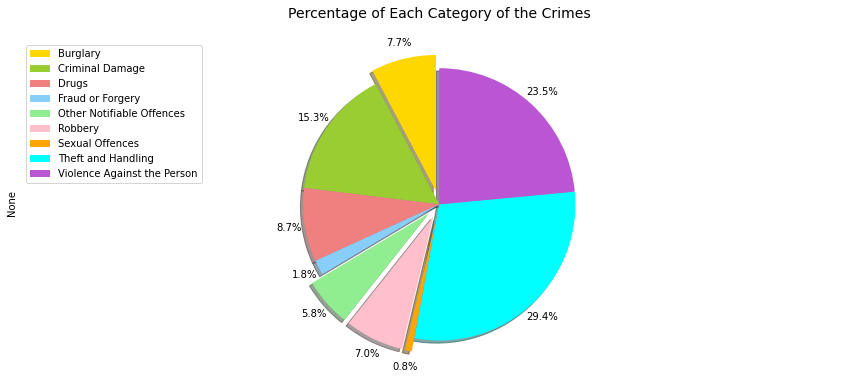

In [6]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'orange', 'cyan','mediumorchid']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1, 0.1, 0, 0] # ratio for each continent with which to offset each wedge.
EachCrimes_index = ['Burglary', 'Criminal Damage', 'Drugs', 'Fraud or Forgery', 'Other Notifiable Offences', 'Robbery', 'Sexual Offences', 'Theft and Handling', 'Violence Against the Person']

Each_Crimes=df.groupby(['major_category']).size()
Each_Crimes.plot(kind='pie',
                 figsize=(15, 6),
                 autopct='%1.1f%%', 
                 startangle=90,    
                 shadow=True,         # untuk memberikan shadow
                 labels=None,         # untuk menghapus label chart
                 pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                 colors=colors_list,  # add custom colors
                 explode=explode_list # 'explode' lowest 3 continents     # start angle 90°  
                )

plt.title('Percentage of Each Category of the Crimes\n', fontsize = 14)
plt.legend(labels=EachCrimes_index, loc='upper left') 
plt.axis('equal')
plt.show()

Dari data yang diperoleh di atas, disimpulkan bahwa kejahatan jenis Theft and Handling adalah jenis kejahatan yang paling banyak terjadi di Kota London sebanyak 29.4%

Diikuti oleh kejahatan kedua yang paling banyak terjadi yaitu Violence Against the Person sebanyak 23.5%

Diikuti oleh kejahatan ketiga yang paling banyak terjadi adalah Criminal Damage sebanyak 15.3%

### 2. Line Chart
Dengan menggunakan line chart, tunjukkan tahun berapakah kasus kejahatan paling banyak dan paling sedikit terjadi di London?

Dikelompokkan terlebih dahulu menggunakan .groupby() berdasarkan kolom year. Ditambahkan .sum() untuk menjumlahkan semua kasus yang terjadi pada 1 tahun di kota metropolitan

In [7]:
df_new=df.groupby('year').sum()

Kemudian kolom yang tidak digunakan untuk membuat line chart, dapat dihapus dengan menggunakan .drop('column_name', axis = 1)

In [8]:
df_new2 = df_new.drop('month', axis =1)
df_new2

,value
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


Selanjutnya adalah kita akan membuat line chart dengan menggunakan .plot(kind = line), untuk tambahan agar datanya lebih mudah dimengerti, dapat menambahkan color dan marker sehingga codingnya menjadi: .plot(kind = line, color = 'color_name', marker = 'jenis marker').

Setelah itu, kita dapat memberikan title dengan plt.title('judul chart')
memberikan label pada sumbu y dengan plt.ylabel('nama sumbu y')
memberikan label pada sumbu x dengan plt.xlabel('nama sumbu x')

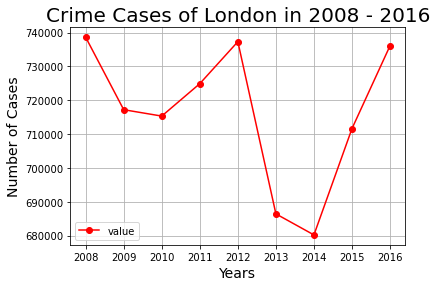

In [9]:
df_new2.plot(kind = 'line', color ='red', marker = 'o') # membuat grafik baris dengan tambahan warna dan marker untuk memperjelas titik
plt.title('Crime Cases of London in 2008 - 2016', fontsize = 20) # membuat judul grafik
plt.ylabel('Number of Cases', fontsize = 14) # memberi keterangan sumbu y
plt.xlabel('Years', fontsize = 14) # memberi keterangan sumbu x
plt.grid(True) # membuat grid pada grafik
plt.show()

Terlihat bahwa jumlah kasus kejahatan yang terjadi di London, paling banyak terjadi pada tahun 2008 sebanyak 738641 kasus. Sedangkan jumlah kasus kejahatan paling sedikit terjadi di London pada tahun 2014 sebanyak 680183 kasus.

### 3. Area Plot
Dengan menggunakan Area Plot, bandingkan perkembangan kasus kejahatan Theft and Handling pada 3 kota di London pada tahun 2008 - 2016.

 Akan difilter terlebih dahulu data untuk kota Greenwich dan kasus Theft and Handling dengan menggunakan .loc()
 
 Kemudian dilanjut dengan menggunakan .drop() untuk menghapus kolom tertentu
 
 Lalu dibuat data berdasarkan grup 'year' dengan .groupby()
 
 Kita juga dapat merename kolom tertentu dengan menggunakan format .rename(columns={oldname:newname})

In [10]:
df_new7 = df.loc[(df['borough'] == 'Greenwich') & (df['major_category'] == 'Theft and Handling')]
df_new8 = df_new7.drop('minor_category', axis =1)
df_new9 = df_new8.drop('lsoa_code', axis=1)
df_greenwich = df_new9.groupby('year').sum()
df_greenwich2 = df_greenwich.rename(columns={"value":"Greenwich"})
df_greenwich3 = df_greenwich2.drop('month', axis=1)
df_greenwich3

,Greenwich
year,
2008,7162
2009,6574
2010,6689
2011,6878
2012,7935
2013,7319
2014,7250
2015,7106
2016,8010


Dengan cara yang sama, menggunakan .loc() untuk filtering data kota kedua yaitu City of London, kemudian kolom minor category dan lsoa_code dihapus dengan menggunakan .drop()  dan mengelompokkan data yang telah dikelola berdasarkan year dengan .groupby().

In [11]:
df_new10 = df.loc[(df['borough'] == 'City of London') & (df['major_category'] == 'Theft and Handling')]
df_new11 = df_new10.drop('minor_category', axis =1)
df_new12 = df_new11.drop('lsoa_code', axis=1)
df_CityofLondon = df_new12.groupby('year').sum()
df_CityofLondon1 = df_CityofLondon.drop('month', axis = 1)
df_CityofLondon2 = df_CityofLondon1.rename(columns={'value':'City of London'})
df_CityofLondon2

,City of London
year,
2008,0
2009,0
2010,0
2011,45
2012,121
2013,79
2014,83
2015,104
2016,129


Dengan cara yang sama, menggunakan .loc() untuk filtering data kota kedua yaitu Redbridge, kemudian kolom minor category dan lsoa_code dihapus dengan menggunakan .drop()  dan mengelompokkan data yang telah dikelola berdasarkan year dengan .groupby().

In [12]:
df_new13 = df.loc[(df['borough'] == 'Redbridge') & (df['major_category'] == 'Theft and Handling')]
df_new14 = df_new13.drop('minor_category', axis =1)
df_new15 = df_new14.drop('lsoa_code', axis=1)
df_RedBridge = df_new15.groupby('year').sum()
df_RedBridge1 = df_RedBridge.drop('month', axis = 1)
df_RedBridge2 = df_RedBridge1.rename(columns={'value':'RedBridge'})
df_RedBridge2

,RedBridge
year,
2008,7825
2009,8074
2010,8482
2011,8803
2012,8935
2013,8099
2014,7025
2015,6806
2016,7447


Untuk menambahkan kolom City of London, dapat menggunakan cara manual yaitu membuat variabel dan valuesnya sesuai dengan tabel City of London, digabungkan dengan menggunakan metode table_name['tambahan_kolom'] = variabel seperti di bawah ini

In [13]:
City_of_London = [0,0,0,45,121,79,83,104,129]
df_greenwich3['City of London'] = City_of_London
df_greenwich3

,Greenwich,City of London
year,,
2008,7162,0
2009,6574,0
2010,6689,0
2011,6878,45
2012,7935,121
2013,7319,79
2014,7250,83
2015,7106,104
2016,8010,129


Dengan cara yang sama, menggunakan menggunakan cara manual yaitu membuat variabel dan valuesnya sesuai dengan tabel Redbridges, digabungkan dengan menggunakan metode table_name['tambahan_kolom'] = variabel seperti di bawah ini

In [14]:
df_GC = df_greenwich3
RedBridge = [7825, 8074, 8482, 8803, 8935, 8099, 7025, 6806, 7447]
df_GC['Redbridge'] = RedBridge

Setelah tabelnya selesai digabungkan, kita dapat membuat area chart dengan .plot(kind = 'area', stacked = False, figsize = (20,10)) Untuk figsize tidak diharuskan 20x10. 

Setelah itu, kita dapat memberikan title dengan plt.title('judul chart')
memberikan label pada sumbu y dengan plt.ylabel('nama sumbu y')
memberikan label pada sumbu x dengan plt.xlabel('nama sumbu x')

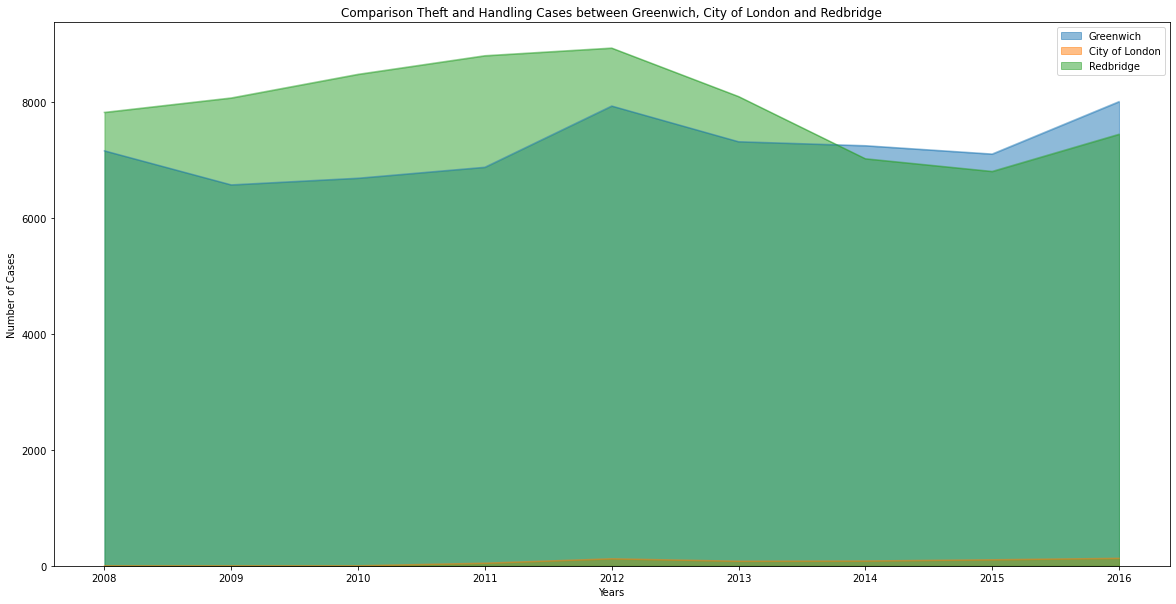

In [15]:
df_GC.plot(kind='area', 
           stacked=False,
           figsize=(20, 10), # pass a tuple (x, y) size
          )

plt.title('Comparison Theft and Handling Cases between Greenwich, City of London and Redbridge')
plt.ylabel('Number of Cases')
plt.xlabel('Years')

plt.show()

Terdapat perbedaan yang sangat dominan apabila melihat kasus Theft and Handling di Greenwich, City of London, dan Redbridge. Sedikitnya jumlah kasus City of London dapat disebabkan karena masyarakat yang patuh dan berhati-hati serta pemerintah yang memperketat sistem hukuman untuk kasus Theft and Handling.

## 4. Histogram
Dengan menggunakan Histogram, tentukan frekuensi munculnya kasus Drugs di kota Wandswort pada tahun 2010 - 2015

Dengan menggunakan cara yang sama seperti pada Area Plot, untuk membuat data histogram, dapat menggunakan .loc() untuk filtering data kota kedua yaitu Wandsworth, kemudian kolom minor category dan lsoa_code dihapus dengan menggunakan .drop()  dan mengelompokkan data yang telah dikelola berdasarkan year dengan .groupby().

In [16]:
df_new16 = df.loc[(df['borough'] == 'Wandsworth') & (df['major_category'] == 'Drugs')]
df_new17 = df_new16.drop('minor_category', axis =1)
df_new18 = df_new17.drop('lsoa_code', axis=1)
df_Wandsworth = df_new18.groupby('year').sum()
df_Wandsworth1 = df_Wandsworth.drop('month', axis = 1)
df_Wandsworth2 = df_Wandsworth1.rename(columns={'value':'Wandsworth'})
df_Wandsworth2

,Wandsworth
year,
2008,1281
2009,1356
2010,1261
2011,1006
2012,1045
2013,1071
2014,885
2015,718
2016,870


Karena kita ingin membuat daata pada tahun 2010 - 2015, kita dapat menghapus baris 2008, 2009, dan 2016 dengan menggunakan .drop(['row_name','row_name2','row_name3'], axis = 0)

In [17]:
df_Wandsworth3 = df_Wandsworth2.drop([2008,2009,2016], axis = 0)

Lalu, untuk membuat grafik histogram, dapat menggunakan .plot(kind = 'hist', figsize = (10,6)). Untuk memperjelas grafiknya, kita dapat menambahkan edge pada pinggiran grafiknya sesuai dengan warna yang diiginkan, contohnya di bawah ini:

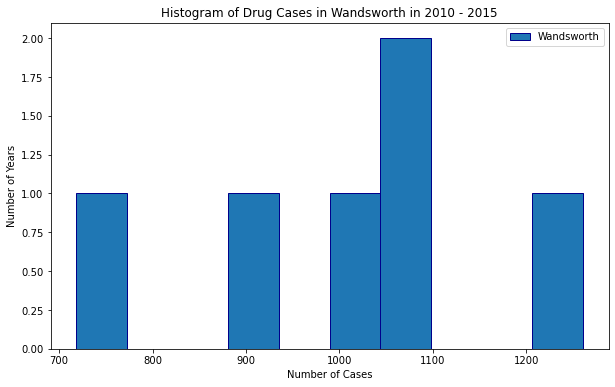

In [18]:
df_Wandsworth3.plot(kind='hist', figsize=(10, 6), edgecolor='darkblue')

plt.title('Histogram of Drug Cases in Wandsworth in 2010 - 2015')
plt.ylabel('Number of Years')
plt.xlabel('Number of Cases')

plt.show()

Dalam histogram di atas, disimpulkan bahwa:
700 - 800 kasus Drugs muncul 1 kali, 850 - 950 kasus Drugs muncul 1 kali, 951 - 1045 kasus muncul 1 kali, 1046 - 1100 kasus muncul 2 kali, dan jumlah kasus Drugs lebih dari 1200 muncul 1 kali dalam rentan waktu 2010 - 2015

## 5. Bar Plot
Tunjukkan total setiap kasus kejahatan yang terjadi di London dari tahun 2008 - 2016 serta kasus manakah yang paling banyak terjadi di London pada waktu kurun tersebut?

Akan dikelompokkan terlebih dahulu terhadap major category dengan menggunakan .groupby().sum()

Kemudian kolom yang tidak dibutuhkan dapat dihapus dengan .drop('column_name', axis = 1)

In [19]:
df_new19=df.groupby('major_category').sum()
df_new20=df_new19.drop(['year', 'month'], axis = 1)
df_new20

,value
major_category,
Burglary,754293
Criminal Damage,630938
Drugs,470765
Fraud or Forgery,5325
Other Notifiable Offences,106349
Robbery,258873
Sexual Offences,1273
Theft and Handling,2661861
Violence Against the Person,1558081


Setelah data terkumpul, dibuat grafik bar horizontal dengan mneggunakan .plot(kind = 'barh'). Agar grafik tidak monoton, dapat menambahkan color. Setelah itu, kita dapat memberikan title dengan plt.title('judul chart') memberikan label pada sumbu y dengan plt.ylabel('nama sumbu y') memberikan label pada sumbu x dengan plt.xlabel('nama sumbu x')

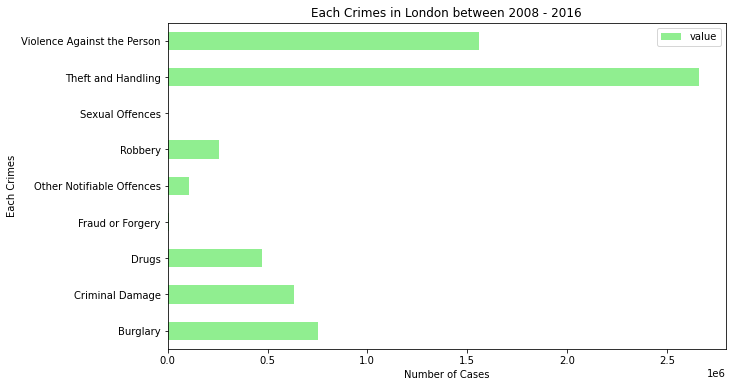

In [20]:
df_new20.plot(kind='barh', color = 'lightgreen', figsize=(10, 6))
plt.xlabel('Number of Cases') # add to x-label to the plot
plt.ylabel('Each Crimes') # add y-label to the plot
plt.title('Each Crimes in London between 2008 - 2016') # add title to the plot
plt.show()

Pada tabel di atas terlihat bahwa frekuensi (value/1.000.000) kasus Theft and Handling paling banyak terjadi di London pada kurun waktu 2008 - 2016. Kasus kedua terbanyak adalah kasus Violence Against the Person.

## 6. Boxplot
Dengan Boxplot, bandingkan kasus Criminal Damage di Newham dan Redbridge pada tahun 2008 - 2016. Dengan cara yang sama, menggunakan .loc() untuk filtering data kota yaitu Newham dan cases berdasarkan Criminal Damage, kemudian kolom minor category dan lsoa_code dihapus dengan menggunakan .drop()  dan mengelompokkan data yang telah dikelola berdasarkan year dengan .groupby().

In [24]:
df_new21 = df.loc[(df['borough'] == 'Newham') & (df['major_category'] == 'Criminal Damage')]
df_new22 = df_new21.drop('minor_category', axis =1)
df_new23 = df_new22.drop('lsoa_code', axis=1)
df_Newham = df_new23.groupby('year').sum()
df_Newham1 = df_Newham.drop('month', axis = 1)
df_Newham2 = df_Newham1.rename(columns={'value':'Newham'})
df_Newham2

,Newham
year,
2008,3690
2009,3431
2010,3025
2011,2477
2012,2357
2013,2081
2014,2223
2015,2397
2016,2496


Untuk menambahkan kolom Redbridge, dapat menggunakan cara manual yaitu membuat variabel dan valuesnya sesuai dengan tabel Redbridge, digabungkan dengan menggunakan metode table_name['tambahan_kolom'] = variabel seperti di bawah ini

In [22]:
df_Newham2['Redbridge'] = RedBridge
df_NR = df_Newham2
df_NR

,Newham,Redbridge
year,,
2008,3690,7825
2009,3431,8074
2010,3025,8482
2011,2477,8803
2012,2357,8935
2013,2081,8099
2014,2223,7025
2015,2397,6806
2016,2496,7447


Setelah data terkumpul, dibuat grafik boxplot dengan mneggunakan .plot(kind = 'box'). Agar grafik tidak monoton, dapat menambahkan color. Setelah itu, kita dapat memberikan title dengan plt.title('judul chart') memberikan label pada sumbu y dengan plt.ylabel('nama sumbu y') memberikan label pada sumbu x dengan plt.xlabel('nama sumbu x')

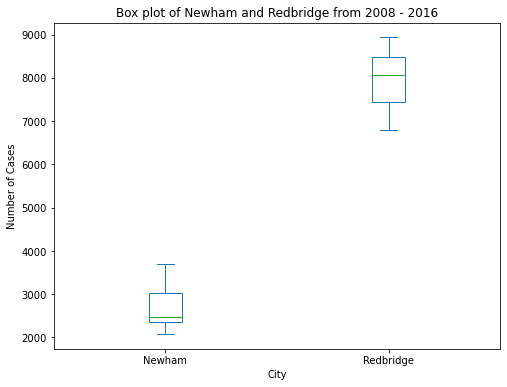

In [23]:
df_NR.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Newham and Redbridge from 2008 - 2016')
plt.ylabel('Number of Cases')
plt.xlabel('City')
plt.show()

Dari data Boxplot di atas, diperoleh bahwa tingkat kasus Criminal Damage Newham dengan Redbridge sangat jauh signifikan. Dimana untuk Newham, jumlah kasus maksimalnya adalah 3690 kasus dan minimalnya adalah 2081. Untuk Redbridge, jumlah kasus maksimalnya adalah 8935 dan minimalnya adalah 6806.

## 7. Scatter Plot
Dengan Scatter Plot, tunjukkan perkembangan kasus Drugs pada Wandsworth dan kasus Theft Handling pada City of London setiap tahunnya

Dari tabel sebelumnya df_Wandsworth2 dapat ditambahkan sebuah kolom City of London dengan df_Wandsworth2['City of London']  = City_of_London.
Untuk mereset indeks, kita dapat menggunakan .reset_index()

In [27]:
df_Wandsworth2['City of London'] = City_of_London
df_CW = df_Wandsworth2
df_CW2 = df_CW.reset_index()
df_CW2

,year,Wandsworth,City of London
0,2008,1281,0
1,2009,1356,0
2,2010,1261,0
3,2011,1006,45
4,2012,1045,121
5,2013,1071,79
6,2014,885,83
7,2015,718,104
8,2016,870,129


Lalu, kita dapat menambahkan kolom total kedua kasus dari Wandsworth dan City of London dengan menambahkan setiap kolom seperti di bawah ini

In [28]:
df_CW2['Total'] = df_CW2['Wandsworth'] + df_CW2['City of London']

Setelah data terkumpul, dibuat grafik boxplot dengan mneggunakan .plot(kind = 'scatter'). Agar grafik tidak monoton, dapat menambahkan color. Setelah itu, kita dapat memberikan title dengan plt.title('judul chart') memberikan label pada sumbu y dengan plt.ylabel('nama sumbu y') memberikan label pada sumbu x dengan plt.xlabel('nama sumbu x')

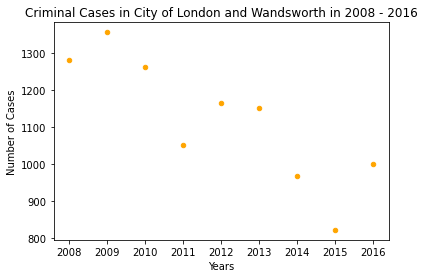

In [29]:
df_CW2.plot(kind = 'scatter', x = 'year', y = 'Total', color = 'orange')
plt.title('Criminal Cases in City of London and Wandsworth in 2008 - 2016')
plt.ylabel('Number of Cases')
plt.xlabel('Years')
plt.show()

## 8. Wordclouds
Please download the file at https://raw.githubusercontent.com/fellysiadevi/H8_006/dataset/criminal_case.txt and save as criminal.txt. Kemudian kita import wordcloud, image, dan numpy

In [29]:
from wordcloud import WordCloud, STOPWORDS

In [30]:
from PIL import Image
import numpy as np

Selanjutnya kita open dokumennya sesuai dengan lokasi dokumen di internal laptop masing-masing

In [31]:
criminal = open(r'C:\Users\HP\criminal.txt', "r").read()

In [32]:
criminal

'"Crime in London\nFigures on crime in London are based primarily on two sets of statistics: the Crime Survey for England and Wales (CSEW) and police recorded crime data. Greater London is generally served by three police forces; the Metropolitan Police which is responsible for policing the vast majority of the capital, the City of London Police which is responsible for The Square Mile of the City of London, and the British Transport Police which polices the national rail network and the London Underground. A fourth police force in London, the Ministry of Defence Police, do not generally become involved with policing the general public. London also has a number of small constabularies for policing parks. Within the Home Office crime statistic publications Greater London is referred to as the London Region.\n\nRecording of robbery offences in England and Wales are sub-divided into Business Robbery (robbery of a business, e.g. a bank robbery) and Personal Robbery (taking an individuals p

kemudian diset stepwords seperti di bawah ini

In [33]:
stopwords = set(STOPWORDS)

Lalu file tersebut digenerate menjadi words cloud seperti di bawah ini

In [34]:
criminal_tx = WordCloud(
    background_color='white',
    max_words=100,
    stopwords=stopwords
)

# generate the word cloud
criminal_tx.generate(criminal)

Setelah digenerate, kita tampilkan word cloudsnya dengan menggunakan dengan 

plt.imshow(.txt, interpolation = 'bilinear')

plt.axis('off')

plt.show()

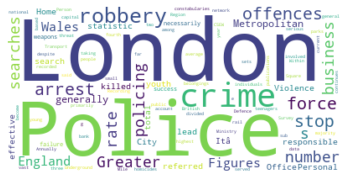

In [18]:
plt.imshow(criminal_tx, interpolation='bilinear')
plt.axis('off')
plt.show()

Untuk menghapus beberapa kata yang tidak berkaitan, kita dapat menggunakan stopwords.update(['kata1', 'kata2'])

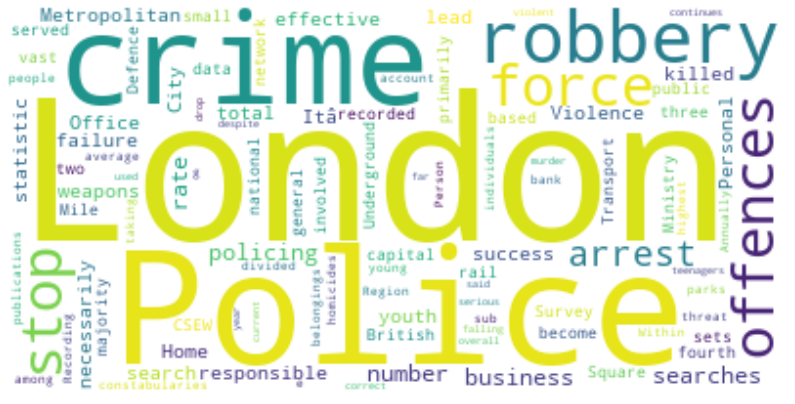

In [19]:
stopwords.update(["England", "Greater", "Wales", "Figures", "OfficePersonal", "s", "referred", "generally"])

# re-generate the word cloud
criminal_tx.generate(criminal)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(criminal_tx, interpolation='bilinear')
plt.axis('off')
plt.show()

## 9. Folium

folium kita import terlebih dahulu

In [84]:
import folium

Kemudian kita dapat menunjukkan map London dengan folium.Map(location = [latitude, longitude], zoom_start = 10). Angka zoom start tidak harus 10, dapat diatur sesuai ketentuan sendiri.

In [92]:
London = folium.Map(location=[51.507351, -0.127758],TileLayer='Mapbox Bright',zoom_start = 10)
London

Kita juga dapat membuat marker dengan folium.Marker(location =[latitude, longitude], popup="<strong>London</strong>", tooltip="Click for more information").add_to(London))

In [93]:
folium.Marker(location =[51.507351, -0.127758], popup="<strong>London</strong>", tooltip="Click for more information").add_to(London)

In [94]:
London